# 주식과 가상화폐의 상관관계

##### 필요한 패키지 사전 설치 

Dependencies

``` cmd
pip install yfinance pandas-datareader mplfinance

```


## 1. 데이터 수집

### 네이버 금융 코스피 지수 크롤링

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import ssl

```python
# 맨 뒤 페이지 숫자
url = "https://finance.naver.com/sise/sise_index_day.naver?code=KOSPI"
with urlopen(url) as doc:
    html = BeautifulSoup(doc,"lxml")
    pgrr = html.find("td", class_="pgRR")
    last_page_num = pgrr.a["href"].split("=")[-1]
    
kospi = pd.DataFrame()
kospi_test = pd.DataFrame()
for i in range(1,int(last_page_num)+1):
    page_url = "{}&page={}".format(url,i)
    kospi = pd.concat([kospi,pd.read_html(page_url, header=0)[0]])
                   
kospi = kospi.dropna()    
kospi["날짜"] = pd.to_datetime(kospi["날짜"])
kospi = kospi.set_index("날짜")
kospi = kospi.sort_index(ascending=True)

# 데이터 저장
kospi.to_csv("kospi.csv")
```

In [2]:
kospi = pd.read_csv("kospi.csv")
kospi = kospi.set_index("날짜")
kospi = kospi.sort_index(ascending=True)
kospi.index = pd.DatetimeIndex(kospi.index)
kospi.head()

체결가    전일비     등락률  거래량(천주)  거래대금(백만)
날짜                                                  
1990-01-04  928.82  20.23  +2.23%  18094.0  405061.0
1990-01-05  915.11  13.71  -1.48%  22179.0  476295.0
1990-01-06  912.86   2.25  -0.25%  12519.0  269397.0
1990-01-08  919.46   6.60  +0.72%  17577.0  369946.0
1990-01-09  920.21   0.75  +0.08%  18646.0  382992.0

### Yahoo Finance S&P500 지수 크롤링

In [3]:
import yfinance as yf
from pandas_datareader import data as pdr

```python
yf.pdr_override()
SP_500 = pdr.get_data_yahoo("^GSPC", start="1990-01-01")

# 데이터 저장
SP_500.to_csv("SP_500.csv")

```

In [4]:
SP_500 = pd.read_csv("SP_500.csv").set_index("Date").sort_index(ascending=True)
SP_500.index = pd.DatetimeIndex(SP_500.index)
SP_500.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
1990-01-02  353.399994  359.690002  351.980011  359.690002  359.690002   
1990-01-03  359.690002  360.589996  357.890015  358.760010  358.760010   
1990-01-04  358.760010  358.760010  352.890015  355.670013  355.670013   
1990-01-05  355.670013  355.670013  351.350006  352.200012  352.200012   
1990-01-08  352.200012  354.239990  350.540009  353.790009  353.790009   

               Volume  
Date                   
1990-01-02  162070000  
1990-01-03  192330000  
1990-01-04  177000000  
1990-01-05  158530000  
1990-01-08  140110000

### 비트코인 & 이더리움 시세 크롤링

``` python
BTC = pdr.get_data_yahoo("BTC-USD", start="1990-01-01")
ETH = pdr.get_data_yahoo("ETH-USD", start="1990-01-01")

BTC.to_csv("BTC.csv")
ETH.to_csv("ETH.csv")

```

In [5]:
BTC = pd.read_csv("BTC.csv").set_index("Date").sort_index(ascending=True)
BTC.index = pd.DatetimeIndex(BTC.index)

ETH = pd.read_csv("ETH.csv").set_index("Date").sort_index(ascending=True)
ETH.index = pd.DatetimeIndex(ETH.index)

In [6]:
ETH.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2017-11-09  308.644989  329.451996  307.056000  320.884003  320.884003   
2017-11-10  320.670990  324.717987  294.541992  299.252991  299.252991   
2017-11-11  298.585999  319.453003  298.191986  314.681000  314.681000   
2017-11-12  314.690002  319.153015  298.513000  307.907990  307.907990   
2017-11-13  307.024994  328.415009  307.024994  316.716003  316.716003   

                Volume  
Date                    
2017-11-09   893249984  
2017-11-10   885985984  
2017-11-11   842300992  
2017-11-12  1613479936  
2017-11-13  1041889984

### 금 시세

출처: https://www.gold.org/goldhub/data/gold-prices#registration-type=google&just-verified=1

```python
# gold price per ounce
gold = pd.read_excel("Prices.xlsx", sheet_name="Daily", skiprows=8, usecols="D:AB", index_col="Name")
gold = gold[["US dollar"]]
gold.to_csv("Gold.csv")
```

In [7]:
gold = pd.read_csv("Gold.csv")
gold = gold.set_index("Name")
gold = gold.sort_index(ascending=True)
gold.index = pd.DatetimeIndex(gold.index)
gold.head(10)

US dollar
Name                 
1978-12-29     226.00
1979-01-01     226.00
1979-01-02     226.80
1979-01-03     218.60
1979-01-04     223.15
1979-01-05     225.50
1979-01-08     223.10
1979-01-09     224.00
1979-01-10     220.70
1979-01-11     220.65

## 2. 시각화

In [8]:
import mplfinance as mpf
import matplotlib.pyplot as plt
import seaborn as sns

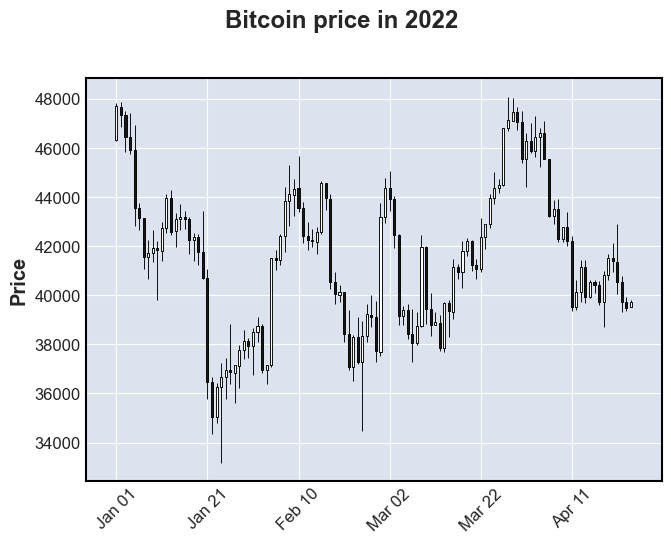

In [9]:
mpf.plot(BTC["2022-01-01":], title="Bitcoin price in 2022", type="candle")

#### KOSPI vs S&P500 비교

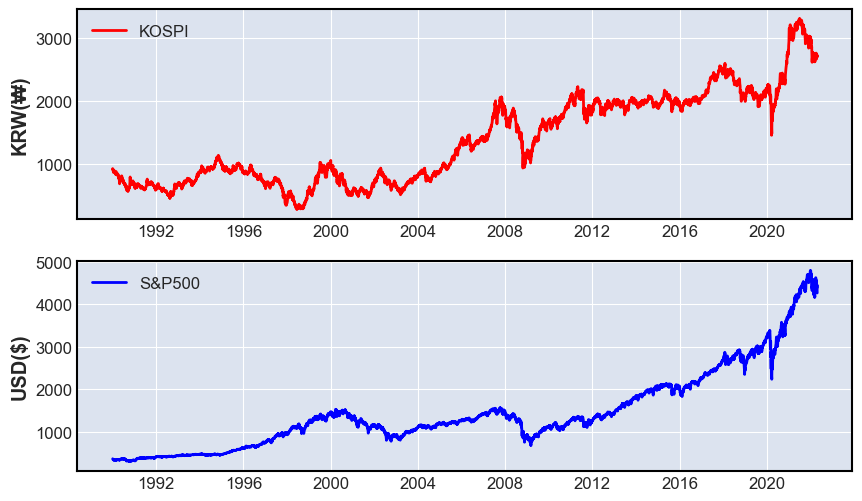

In [10]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(kospi.index, kospi["체결가"],"r", label="KOSPI")
plt.legend(loc="best")
plt.ylabel("KRW(₩)")
plt.subplot(2,1,2)
plt.plot(SP_500.index, SP_500["Close"],"b", label="S&P500")
plt.legend(loc="best")
plt.ylabel("USD($)")
plt.show()

#### 비트코인 vs 이더리움 가격 비교

In [11]:
adj_ETH = pd.DataFrame(columns=ETH.columns, index=BTC[:"2017-11-08"].index, data=0).append(ETH)

In [12]:
adj_ETH

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-09-17     0.000000     0.000000     0.000000     0.000000     0.000000   
2014-09-18     0.000000     0.000000     0.000000     0.000000     0.000000   
2014-09-19     0.000000     0.000000     0.000000     0.000000     0.000000   
2014-09-20     0.000000     0.000000     0.000000     0.000000     0.000000   
2014-09-21     0.000000     0.000000     0.000000     0.000000     0.000000   
...                 ...          ...          ...          ...          ...   
2022-04-20  3103.935059  3157.885742  3045.288330  3077.745850  3077.745850   
2022-04-21  3077.829346  3173.451416  2962.410400  2987.480713  2987.480713   
2022-04-22  2986.938721  3024.854492  2942.358643  2964.835693  2964.835693   
2022-04-23  2964.802246  2975.322754  2926.740234  2938.114014  2938.114014   
2022-04-24  2938.327637  2956.947754  2929.265137  2949.702148  2949.702148   

                 Volume  
Date                     
2014-09-17            0  
2014-09-18            0  
2014-09-19            0  
2014-09-20            0  
2014-09-21            0  
...                 ...  
2022-04-20  15547362265  
2022-04-21  20783591093  
2022-04-22  16782795477  
2022-04-23   9116955609  
2022-04-24   8519581184  

[2777 rows x 6 columns]

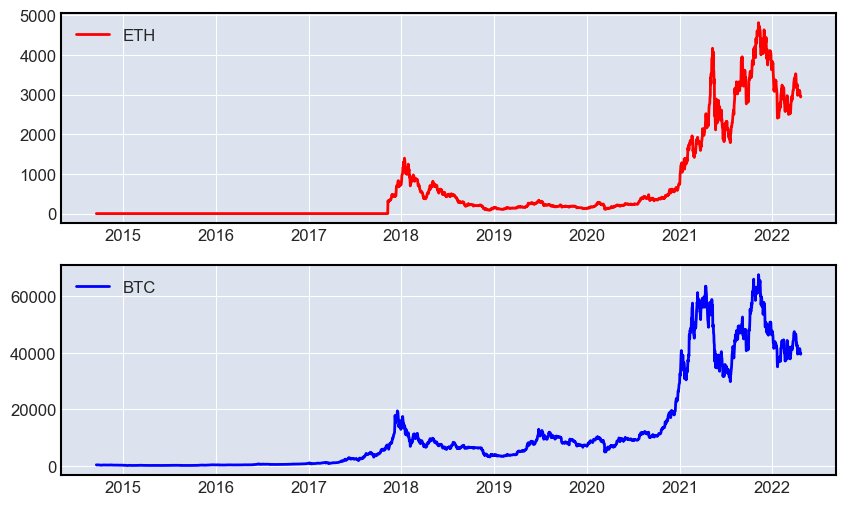

In [13]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(adj_ETH.index, adj_ETH["Close"],"r", label="ETH")
plt.legend(loc="upper left")
plt.subplot(2,1,2)
plt.plot(BTC.index, BTC["Close"],"b", label="BTC")
plt.legend(loc="upper left")

#### S&P 500 vs 비트코인 가격 비교 (전체 데이터)

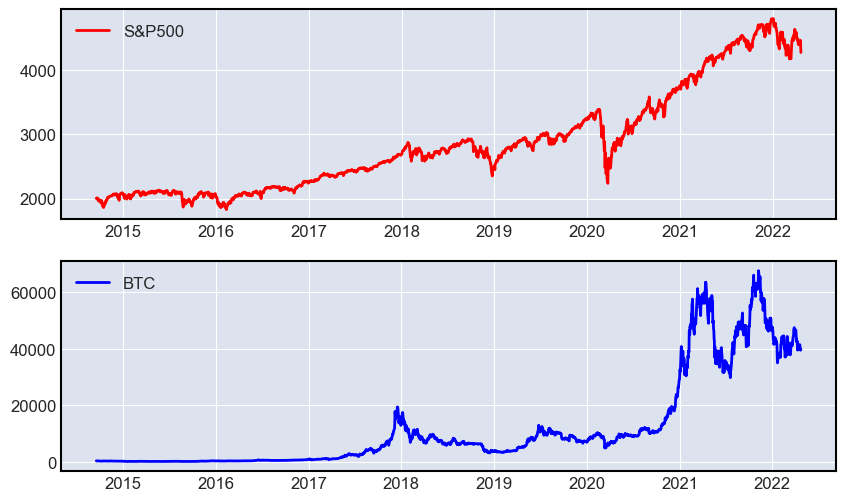

In [14]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(SP_500["2014-09-17":].index, SP_500["2014-09-17":]["Close"],"r", label="S&P500")
plt.legend(loc="upper left")
plt.subplot(2,1,2)
plt.plot(BTC.index, BTC["Close"],"b", label="BTC")
plt.legend(loc="upper left")

#### S&P 500 vs 비트코인 가격 비교 (최근 3년)

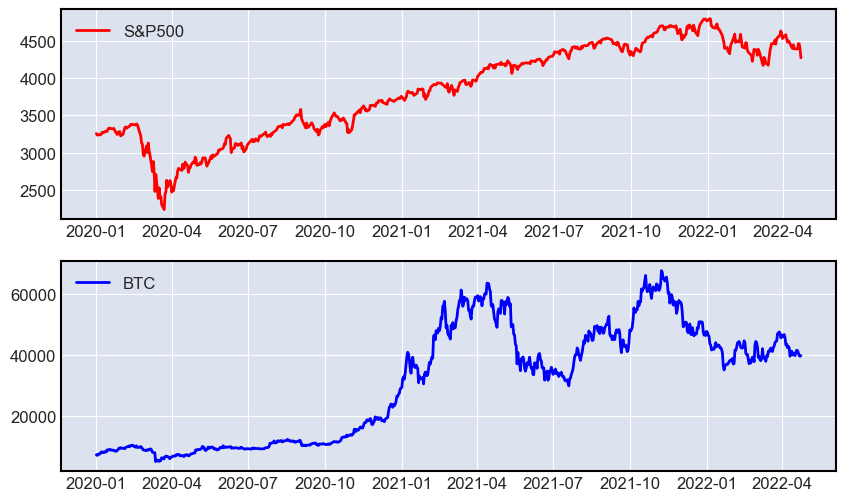

In [15]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(SP_500["2020-01-01":].index, SP_500["2020-01-01":]["Close"],"r", label="S&P500")
plt.legend(loc="upper left")
plt.subplot(2,1,2)
plt.plot(BTC["2020-01-01":].index, BTC["2020-01-01":]["Close"],"b", label="BTC")
plt.legend(loc="upper left")

In [20]:
# Using plotly.express
import plotly.express as px

In [21]:
SP_500["2014-09-17":]

Open         High          Low        Close    Adj Close  \
Date                                                                          
2014-09-17  1999.300049  2010.739990  1993.290039  2001.569946  2001.569946   
2014-09-18  2003.069946  2012.339966  2003.069946  2011.359985  2011.359985   
2014-09-19  2012.739990  2019.260010  2006.589966  2010.400024  2010.400024   
2014-09-22  2009.079956  2009.079956  1991.010010  1994.290039  1994.290039   
2014-09-23  1992.780029  1995.410034  1982.770020  1982.770020  1982.770020   
...                 ...          ...          ...          ...          ...   
2022-04-18  4385.629883  4410.310059  4370.299805  4391.689941  4391.689941   
2022-04-19  4390.629883  4471.029785  4390.629883  4462.209961  4462.209961   
2022-04-20  4472.259766  4488.290039  4448.759766  4459.450195  4459.450195   
2022-04-21  4489.169922  4512.939941  4384.470215  4393.660156  4393.660156   
2022-04-22  4385.830078  4385.830078  4267.620117  4271.779785  4271.779785   

                Volume  
Date                    
2014-09-17  3209420000  
2014-09-18  3235340000  
2014-09-19  4880220000  
2014-09-22  3349670000  
2014-09-23  3279350000  
...                ...  
2022-04-18  3509340000  
2022-04-19  3197930000  
2022-04-20  3678040000  
2022-04-21  3833570000  
2022-04-22  3930660000  

[1914 rows x 6 columns]

In [22]:
Date = BTC.index
BTC_Closing_Price = BTC.loc[:,"Close"]
fig = px.line(BTC, x=Date, y=BTC_Closing_Price, labels={"x":"Date", "y":"BTC Closing Price"})
fig.show()

In [23]:
raw_data = pd.DataFrame(data={"BTC": BTC.loc[:,"Close"],
                          "ETH": adj_ETH.loc[:,"Close"],
                          "S&P500": SP_500["2014-09-17":].loc[:,"Close"],
                          "kospi": kospi["2014-09-17":].loc[:,"체결가"],
                          "gold" : gold["2014-09-17":].loc[:,"US dollar"]}).dropna()

raw_data.tail(10)

BTC          ETH       S&P500    kospi     gold
2022-04-01  46281.644531  3449.552246  4545.859863  2739.85  1929.40
2022-04-04  46622.675781  3521.241211  4582.640137  2757.90  1930.30
2022-04-05  45555.992188  3411.792480  4525.120117  2759.20  1944.05
2022-04-06  43206.738281  3171.691895  4481.149902  2735.03  1930.15
2022-04-07  43503.847656  3233.274658  4500.209961  2695.86  1932.40
2022-04-08  42287.664062  3192.073975  4488.279785  2700.39  1941.40
2022-04-11  39521.902344  2981.052246  4412.529785  2693.10  1951.55
2022-04-12  40127.183594  3030.376465  4397.450195  2666.76  1960.85
2022-04-13  41166.730469  3118.344238  4446.589844  2716.49  1976.75
2022-04-14  39935.515625  3019.909424  4392.589844  2716.71  1963.25

## 시계열 그래프의 유사도 분석

https://stats.stackexchange.com/questions/133155/how-to-use-pearson-correlation-correctly-with-time-series


### Differentiate Timeseries

In [24]:
diff = raw_data.diff()

In [55]:
recent_data = diff["2019-01-01":]

In [57]:
recent_data.corr()

BTC       ETH    S&P500     kospi      gold
BTC     1.000000  0.700218  0.210649  0.016262  0.025939
ETH     0.700218  1.000000  0.195852  0.068583  0.010355
S&P500  0.210649  0.195852  1.000000  0.267316  0.114148
kospi   0.016262  0.068583  0.267316  1.000000  0.061675
gold    0.025939  0.010355  0.114148  0.061675  1.000000

### Point to Point difference (After Normalization)

In [25]:
def MinMaxScaler(timeseries):
    return (timeseries - min(timeseries))/(max(timeseries)-min(timeseries))

In [26]:
#Normalized Data
norm_BTC, norm_ETH = MinMaxScaler(BTC.loc[:,"Close"]), MinMaxScaler(adj_ETH.loc[:,"Close"])
norm_SP500, norm_kospi = MinMaxScaler(SP_500["2014-09-17":].loc[:,"Close"]), MinMaxScaler(kospi["2014-09-17":].loc[:,"체결가"])


In [27]:
norm_gold = MinMaxScaler(gold["2014-09-17":].loc[:,"US dollar"])

In [28]:
data = pd.DataFrame(data={"BTC": norm_BTC,
                          "ETH": norm_ETH,
                          "S&P500": norm_SP500,
                          "kospi": norm_kospi,
                          "gold":norm_gold}).dropna()

In [29]:
px.line(data, labels={"index":"Date", "value":"Closing Price"})

In [52]:
data.diff().corr('spearman')

BTC       ETH    S&P500     kospi      gold
BTC     1.000000  0.642417  0.135283  0.006164  0.064816
ETH     0.642417  1.000000  0.148796  0.034709  0.087130
S&P500  0.135283  0.148796  1.000000  0.214479 -0.038637
kospi   0.006164  0.034709  0.214479  1.000000  0.007633
gold    0.064816  0.087130 -0.038637  0.007633  1.000000

In [160]:
data.diff()

BTC       ETH    S&P500     kospi      gold
2014-09-17       NaN       NaN       NaN       NaN       NaN
2014-09-18 -0.000488  0.000000  0.003299 -0.008048 -0.015230
2014-09-19 -0.000440  0.000000 -0.000323  0.003291 -0.000737
2014-09-22  0.000109  0.000000 -0.005429 -0.007875 -0.006141
2014-09-23  0.000499  0.000000 -0.003882 -0.005607  0.008352
...              ...       ...       ...       ...       ...
2022-04-08 -0.018047 -0.008562 -0.004020  0.002452  0.008843
2022-04-11 -0.041042 -0.043852 -0.025527 -0.003946  0.009973
2022-04-12  0.008982  0.010250 -0.005082 -0.014257  0.009138
2022-04-13  0.015426  0.018281  0.016559  0.026916  0.015623
2022-04-14 -0.018270 -0.020456 -0.018197  0.000119 -0.013265

[1809 rows x 5 columns]

In [161]:
data.index = pd.to_datetime(data.index,format='%m/%d/%y %I:%M%p')
data = data.diff()
monthly_corr_trend = data.groupby(by=[data.index.year, data.index.month]).corr('spearman')

In [162]:
monthly_corr_trend = monthly_corr_trend.reset_index()

In [163]:
monthly_corr_trend

level_0  level_1 level_2       BTC       ETH    S&P500     kospi  \
0       2014        9     BTC  1.000000       NaN -0.450000 -0.216667   
1       2014        9     ETH       NaN       NaN       NaN       NaN   
2       2014        9  S&P500 -0.450000       NaN  1.000000  0.283333   
3       2014        9   kospi -0.216667       NaN  0.283333  1.000000   
4       2014        9    gold  0.350000       NaN  0.000000  0.200000   
..       ...      ...     ...       ...       ...       ...       ...   
455     2022        4     BTC  1.000000  0.903030  0.769697  0.175758   
456     2022        4     ETH  0.903030  1.000000  0.842424  0.200000   
457     2022        4  S&P500  0.769697  0.842424  1.000000  0.260606   
458     2022        4   kospi  0.175758  0.200000  0.260606  1.000000   
459     2022        4    gold  0.284848  0.103030  0.018182  0.369697   

         gold  
0    0.350000  
1         NaN  
2    0.000000  
3    0.200000  
4    1.000000  
..        ...  
455  0.284848  
456  0.103030  
457  0.018182  
458  0.369697  
459  1.000000  

[460 rows x 8 columns]

In [164]:
monthly_corr_trend["date"] = pd.to_datetime(monthly_corr_trend.level_0.astype(str) + '/' + monthly_corr_trend.level_1.astype(str))

In [169]:
corr_dat = monthly_corr_trend[monthly_corr_trend['level_2']=='BTC'][["date","S&P500","kospi","gold","ETH"]].reset_index(drop=True)

In [170]:
corr_dat.index = corr_dat.date

In [171]:
corr_dat = corr_dat.drop(columns=['date'])

C:\Users\jake1\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



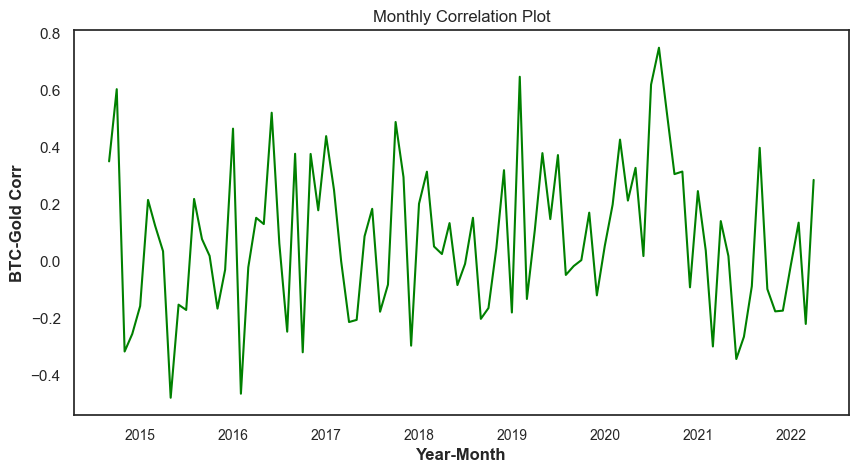

In [211]:
plt.figure(figsize=(10,5))
sns.lineplot(corr_dat.index, corr_dat["gold"], color='green')
sns.set_theme(style='white')
plt.title("Monthly Correlation Plot")
plt.ylabel('BTC-Gold Corr')
plt.xlabel("Year-Month")
plt.xticks(fontsize=10)
plt.show()

In [30]:
BTC_SP_Diff = norm_SP500 - norm_BTC
BTC_ETH_Diff = norm_BTC - norm_ETH
SP_Kos_Diff = norm_SP500 - norm_kospi

In [31]:
px.line(BTC_ETH_Diff, labels={"index":"Date", "value":"Closing Price"})

In [32]:
px.line(SP_Kos_Diff.dropna(), labels={"index":"Date", "value":"Closing Price"})

### Rolling Correlation Trend

In [33]:
diff["BTC"].rolling(30).corr(diff["S&P500"])

2014-09-17         NaN
2014-09-18         NaN
2014-09-19         NaN
2014-09-22         NaN
2014-09-23         NaN
                ...   
2022-04-08    0.479675
2022-04-11    0.516080
2022-04-12    0.505439
2022-04-13    0.610501
2022-04-14    0.621320
Length: 1809, dtype: float64

In [34]:
diff["2021-01-01":].corr()

BTC       ETH    S&P500     kospi      gold
BTC     1.000000  0.707253  0.310605  0.030631 -0.045217
ETH     0.707253  1.000000  0.312157  0.103848 -0.009136
S&P500  0.310605  0.312157  1.000000  0.230618 -0.113823
kospi   0.030631  0.103848  0.230618  1.000000  0.001815
gold   -0.045217 -0.009136 -0.113823  0.001815  1.000000

In [35]:
diff[:"2021-01-01"].corr()

BTC       ETH    S&P500     kospi      gold
BTC     1.000000  0.496466  0.143440 -0.017862  0.137115
ETH     0.496466  1.000000  0.124884  0.027241  0.068751
S&P500  0.143440  0.124884  1.000000  0.273942  0.116213
kospi  -0.017862  0.027241  0.273942  1.000000  0.021775
gold    0.137115  0.068751  0.116213  0.021775  1.000000

In [36]:
px.line(diff["BTC"].rolling(30).corr(diff["S&P500"]), 
        labels={"index":"date(rolling 30 days)", "value":"corr"})

### Monthly Correlation Trend

In [37]:
monthly_corr = data.groupby([data.index.year, data.index.month])["BTC","S&P500"].corr().unstack().loc[:,("BTC","S&P500")]

BTC_SP_monthly_corr = pd.DataFrame(monthly_corr.values, 
                                   columns =["BTC-S&P500"], 
                                   index = pd.date_range("2014-09", "2022-05", freq="M"))

px.bar(BTC_SP_monthly_corr, labels={"index":"Date", "value":"BTC-SP500"})

C:\Users\jake1\AppData\Local\Temp/ipykernel_24224/2031914634.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### Percentage Change Correlation 

In [38]:
def pct_change(timeseries):
    return timeseries.pct_change()

In [39]:
BTC_ret = pct_change(BTC.loc[:,"Close"])
ETH_ret = pct_change(ETH.loc[:,"Close"])
SP_ret = pct_change(SP_500["2014-09-17":].loc[:,"Close"])
kospi_ret = pct_change(kospi["2014-09-17":].loc[:,"체결가"])

pct_data = pd.DataFrame(data={"BTC": BTC_ret,
                          "ETH": ETH_ret,
                          "S&P500": SP_ret,
                          "kospi": kospi_ret})

In [40]:
pct_data.dropna().corr()

BTC       ETH    S&P500     kospi
BTC     1.000000  0.777411  0.238657 -0.022680
ETH     0.777411  1.000000  0.265695  0.016867
S&P500  0.238657  0.265695  1.000000  0.259896
kospi  -0.022680  0.016867  0.259896  1.000000

BTC-ETH percentage change correlation graph

In [41]:
pct_data["ETH"].dropna()

2017-11-10   -0.067411
2017-11-11    0.051555
2017-11-12   -0.021523
2017-11-13    0.028606
2017-11-14    0.066037
                ...   
2022-04-20   -0.008492
2022-04-21   -0.029328
2022-04-22   -0.007580
2022-04-23   -0.009013
2022-04-24    0.003944
Freq: D, Name: ETH, Length: 1627, dtype: float64

In [42]:
px.line(pct_data.dropna(), x=pct_data.dropna().index, y="BTC")

In [43]:
px.scatter(pct_data.dropna(), x="BTC", y="ETH", trendline="ols")

You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


     --------------------------------------- 15.3/15.3 MB 46.8 MB/s eta 0:00:00


SP500-Kospi percentage change correlation graph

In [44]:
px.scatter(pct_data, x="kospi", y="S&P500", trendline="ols")

In [45]:
px.scatter(pct_data[:"2021-01-01"].dropna(), x="BTC", y="S&P500", trendline="ols")

In [46]:
px.scatter(pct_data["2021-01-01":].dropna(), x="BTC", y="S&P500", trendline="ols")